# Teoría


En el paper los autores describen como J. Scott Russell observó y reprodujo en un laboratorio ondas solitarias cuya velocidad $c$ estaba relacionada con la profundidad del agua $h$ y la amplitud $A$ de la siguiente manera:

$$
c^2=g(h+A)
$$

Donde g es la aceleración de la gravedad. Dicha relación implica que ondas con mayor amplitud viajan más rápido que ondas con menor amplitud, lo cual solo puede describirse a través de un sistema no lineal como el de la ecuación KdeV:

$$
\frac{\partial u(x,t)}{\partial t} + \varepsilon u(x,t) \frac{\partial u(x,t)}{\partial x} + \mu \frac{\partial^3 u(x,t)}{\partial x^3} = 0
$$

Para llegar a una solución analítica de esta ecuación se propone una solución en estado estable con la siguiente dependencia en $x$ y $t$:

$$
u(x,t) = f(\xi = x - ct)
$$

De esta manera se obtiene la solución analítica del solitón mostrada en la siguiente sección.


#Solución analítica de un solitón


\\begin{equation}
  u(x,t) = \frac{c}{2} \text{sech}^{2} \left[ \frac{\sqrt{c}}{2}(x - ct - \xi_0)\right]
\end{equation}

Donde $c$ es la velocidad y $\xi_0$ es la posición del pico del solitón en $t=0$.

Para graficar esta solución analítica tomamos $c=1.6$ y $\xi_0 = 12.0$ por conveniencia para comparar después con las soluciones numéricas postuladas por el paper.

In [ ]:
import numpy as np
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go

# Función para graficar en 3D interactivamente
def plot_3d_interactive(X, T, U):
    fig = go.Figure(data=[go.Surface(z=U, x=X, y=T)])
    fig.update_layout(scene=dict(
        xaxis_title='x',
        yaxis_title='t',
        zaxis_title='u(x,t)'
    ))
    fig.show()

# Parámetros
c = 1.6
xi_0 = 12.0

# Rango de x y t
x = np.linspace(-10, 70, 200)
t = np.linspace(0, 20, 200)

# Crear malla de coordenadas
X, T = np.meshgrid(x, t, indexing='ij')

# Definir la función u(x, t)
def u(x, t, c, xi_0):
    return c / 2 * (1 - np.tanh(0.5 * np.sqrt(c) * (x - c * t - xi_0))**2)

# Evaluar la función en la malla
U = u(X, T, c, xi_0)

# Llamar a la función de graficado
plot_3d_interactive(X, T, U)


###Animación

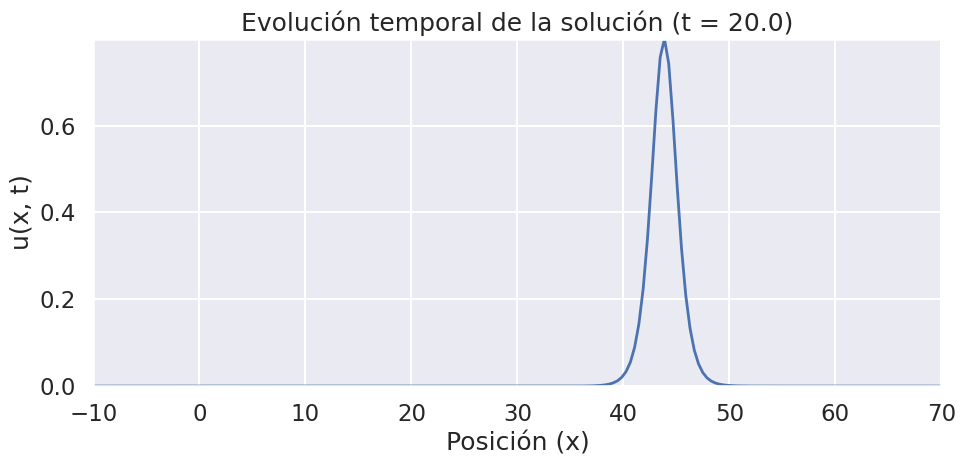

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")

rc('animation', html='jshtml')  # Configurar la salida de la animación
%matplotlib inline

def animate_solution(X, T, U, timestep, interval=50):
    fig, ax = plt.subplots(figsize=(10, 5))
    line, = ax.plot([], [], lw=2)
    ax.set_xlim(np.min(X[:,0]), np.max(X[:,0]))
    ax.set_ylim(np.min(U), np.max(U))
    ax.set_xlabel('Posición (x)')
    ax.set_ylabel('u(x, t)')
    ax.set_title('Evolución temporal de la solución')
    plt.tight_layout()

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
      frame = frame * timestep
      line.set_data(X[:,0], U[:,frame])
      ax.set_title(f'Evolución temporal de la solución (t = {round(T[0, frame], 0)})')
      return line,

    ani = FuncAnimation(fig, update, frames=len(range(0, len(T[0]), timestep)), init_func=init, interval=interval, blit=True)
    return HTML(ani.to_jshtml())

animate_solution(X, T, U, timestep=3)

Observamos que en la solución teórica la forma del solitón nunca cambia y el pico llega a un valor entre 40 y 50 en $x$ tras $t=20$. Lo cual será importante para comparar la velocidad de las soluciones numéricas más adelante.

A continuación se desarrollan de manera numérica los dos problemas cuya condición inicial da el paper.